In [1]:
import cv2
import numpy as np
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt


In [3]:
model = load_model("traffic_sign_model.h5")


In [4]:
classes = ['20 km/h', '30 km/h', '50 km/h', '60 km/h', '70 km/h', '80 km/h', '80 km/h end', '100 km/h', '120 km/h', 'No overtaking',
           'No overtaking for tracks', 'Crossroad with secondary way', 'Main road', 'Give way', 'Stop', 'Road up', 'Road up for track', 'Brock',
           'Other dangerous', 'Turn left', 'Turn right', 'Winding road', 'Hollow road', 'Slippery road', 'Narrowing road', 'Roadwork', 'Traffic light',
           'Pedestrian', 'Children', 'Bike', 'Snow', 'Deer', 'End of the limits', 'Only right', 'Only left', 'Only straight', 'Only straight and right', 
           'Only straight and left', 'Take right', 'Take left', 'Circle crossroad', 'End of overtaking limit', 'End of overtaking limit for track']


In [5]:
def preprocess_image(img_path):
    img = Image.open(img_path)
    img = img.resize((30, 30))
    img = np.array(img)
    img = np.expand_dims(img, axis=0)
    return img


In [6]:
def predict_traffic_sign(img_path):
    processed_img = preprocess_image(img_path)
    prediction = model.predict(processed_img)
    class_index = np.argmax(prediction)
    confidence = np.max(prediction)
    
    print(f"Predicted Class: {classes[class_index]}")
    print(f"Confidence: {confidence:.2f}")
    
    # Display image
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(classes[class_index])
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
Predicted Class: Turn right
Confidence: 1.00


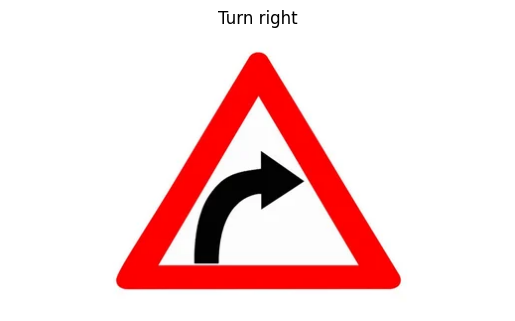

In [9]:
predict_traffic_sign("C:/Users/saleh/Downloads/s21-1160x653-500x500 (1).webp")
